In [1]:
import dolfyn as dlfn

In [18]:
#Read STA file with dolfyn

dat = dlfn.read(r"D:\ADCP\Data\ADCP_Europe_20220921T071131_001_000000.ENX")



Reading file D:\ADCP\Data\ADCP_Europe_20220921T071131_001_000000.ENX ...
  Encountered end of file.  Cleaning up data.


In [19]:
dat

<xarray.Dataset>
Dimensions:              (time: 568, dir: 4, range: 20, beam: 4, time_gps: 568,
                          x: 4, x*: 4, earth: 3, inst: 3)
Coordinates:
  * time                 (time) datetime64[ns] 2022-09-21T07:11:41.029999971 ...
  * dir                  (dir) <U3 'E' 'N' 'U' 'err'
  * range                (range) float64 4.57 6.57 8.57 ... 38.57 40.57 42.57
  * beam                 (beam) int32 1 2 3 4
  * time_gps             (time_gps) datetime64[ns] 2022-09-21T07:11:09.200000...
  * x                    (x) int32 1 2 3 4
  * x*                   (x*) int32 1 2 3 4
  * earth                (earth) <U1 'E' 'N' 'U'
  * inst                 (inst) <U1 'X' 'Y' 'Z'
Data variables: (12/30)
    number               (time) uint32 1 2 3 4 5 6 7 ... 563 564 565 566 567 568
    builtin_test_fail    (time) bool False False False ... False False False
    c_sound              (time) float32 1.529e+03 1.529e+03 ... 1.53e+03
    depth                (time) float32 2.5 2.4 2.5 2.5 2.5 ... 2.3 2.5 2.4 2.5
    pitch                (time) float32 0.0 0.0 0.0 0.0 ... -0.05 -0.08 0.01
    roll                 (time) float32 0.0 0.0 0.0 0.0 ... -0.75 -0.2 0.05
    ...                   ...
    latitude_gps         (time_gps) float64 43.08 43.08 43.08 ... 43.08 43.08
    longitude_gps        (time_gps) float64 5.97 5.97 5.97 ... 5.979 5.979 5.979
    flags                (time) float32 7.743e+03 1.6e+04 ... 8.191e+03
    hdwtime_gps          (time_gps) datetime64[ns] 2022-09-21T07:11:41.029999...
    beam2inst_orientmat  (x, x*) float64 1.462 -1.462 0.0 ... -1.034 -1.034
    orientmat            (earth, inst, time) float64 1.0 1.0 1.0 ... 1.0 1.0
Attributes: (12/38)
    inst_make:                TRDI
    inst_model:               Workhorse
    inst_type:                ADCP
    rotate_vars:              ['vel', 'vel_bt']
    has_imu:                  0
    name:                     unrecognized firmware version
    ...                       ...
    xmit_pulse:               2.44
    water_ref_cells:          [1, 5]
    fls_target_threshold:     50
    xmit_lag_m:               0.5
    fs:                       inf
    vel_gps_corrected:        1

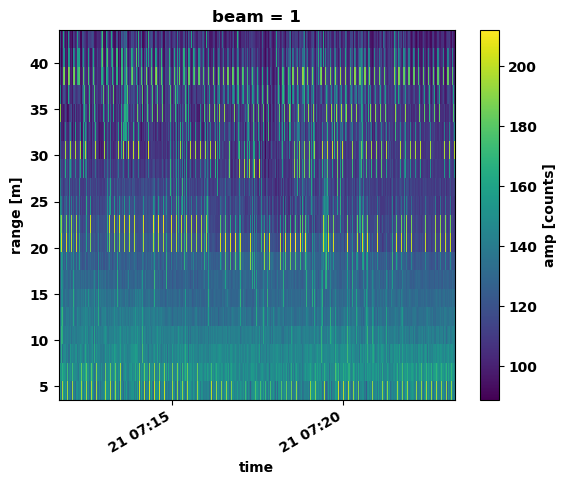

In [20]:
#plot amplitude for beam 0

dat["amp"].isel({"beam":0}).plot()

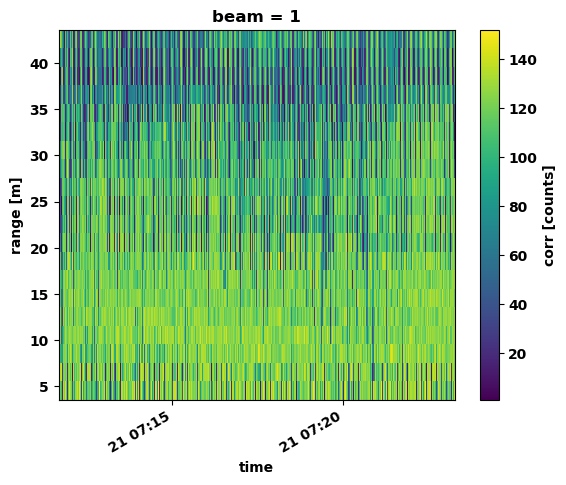

In [21]:
# plot correlation for beam 0
dat["corr"].isel({"beam":0}).plot()

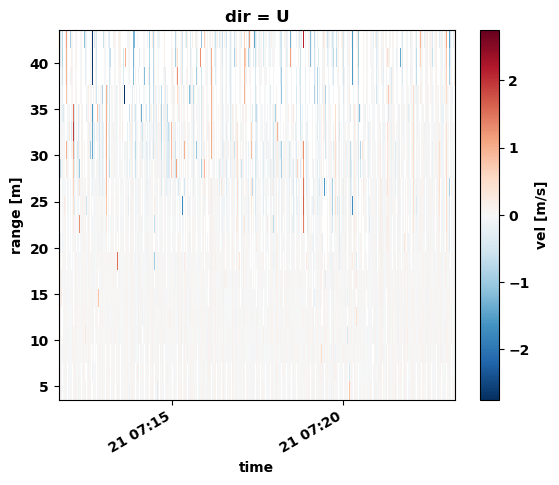

In [22]:
#plot vertical velocity 
dat["vel"].isel({"dir":2}).plot()



In [23]:
# compute velocity norm 
import xarray as xr
import numpy as np

norm_velocity = xr.apply_ufunc(
        np.linalg.norm, dat["vel"], input_core_dims=[["dir"]], kwargs={ "axis": -1}
    )

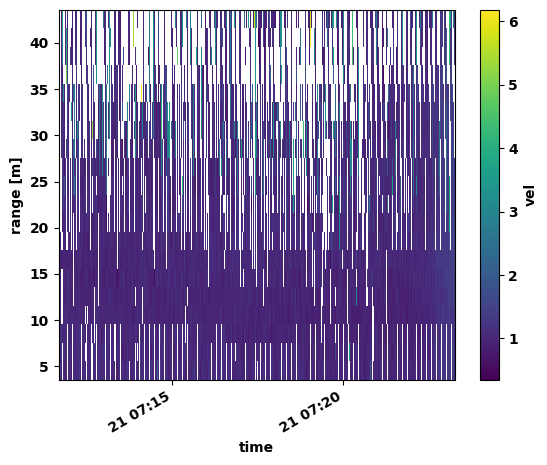

In [24]:
norm_velocity.plot()